In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

/home/anaconda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/anaconda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2*y -1

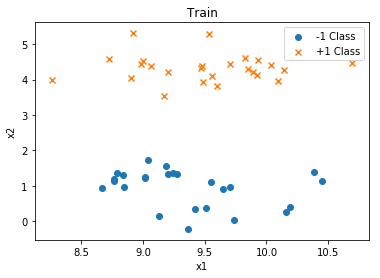

In [4]:
plt.scatter(X[y==-1, 0], X[y==-1, 1], marker='o', label='-1 Class')
plt.scatter(X[y==+1, 0], X[y==+1, 1], marker='x', label='+1 Class')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Train')
plt.show()

In [5]:
from sklearn.svm import SVC

/home/anaconda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
model = SVC(kernel='linear', C=1e10).fit(X, y)

In [11]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()

xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

In [12]:
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1= val
    x2 = X2[i,j]
    p = model.decision_function([[x1, x2]])
    Z[i,j] = p[0]

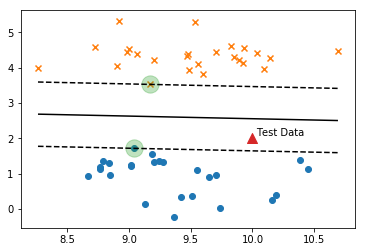

In [13]:
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y==-1, 0], X[y==-1, 1], marker = 'o', label = '-1 Class')
plt.scatter(X[y==+1, 0], X[y==+1, 1], marker = 'x', label = '+1 Class')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, alpha=0.3)

x_new = [10,2]
plt.scatter(x_new[0], x_new[1], marker = '^', s=100)
plt.text(x_new[0]+0.03, x_new[1]+0.08, 'Test Data')
plt.show()

In [14]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])